# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [2,101,201]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
samples['total']=samples.sum(axis=1)
data['total']=data.sum(axis=1)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,6353,8808,7684,2405,3516,7844,36610
1,1420,10810,16267,1593,6766,1838,38694
2,4484,14399,24708,3549,14235,1681,63056


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  total
2     41.6  82.0     65.9    63.6              72.3          98.9   71.1
101   13.0  87.0     87.7    50.7              87.0          75.9   73.6
201   31.4  92.7     95.2    75.0              97.0          72.0   91.8


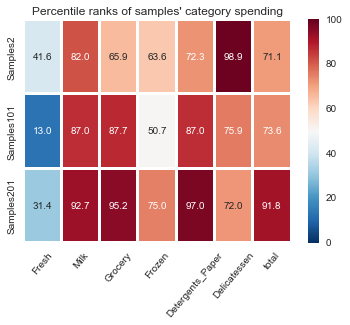

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen  \
0  0.529404  1.519599  0.966386  0.782895          1.220201      5.144044   
1  0.118330  1.864994  2.045835  0.518566          2.348088      1.205348   
2  0.373657  2.484186  3.107425  1.155299          4.940147      1.102389   

      total  
0  1.101843  
1  1.164565  
2  1.897783  


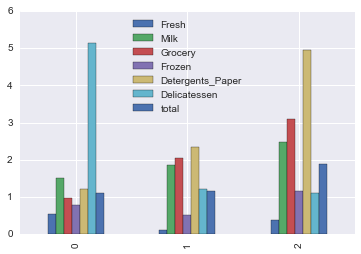

In [4]:
pcs = 100* data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcs
sns.heatmap(pcs,yticklabels=['Samples'+str(x) for x in indices],linewidths=2, annot=True, vmin=0, vmax=100, fmt='.1f',cmap='RdBu_r')
plt.title('Percentile ranks of samples\' category spending')
plt.xticks(rotation=50, ha='center')
plt.show()

mean = data.describe().loc['mean']
samp_mean = samples / mean
_ = samp_mean.plot(kind='bar')
sns.set_style("whitegrid")
sns.despine(left=True)
print samp_mean

**Answer:**

>Sample 0: This customer purchase mostly "Delicatessen" and "Milk" since the percentile is 98.9 and 82.0 respectly indicating that establishment is cafe or yogurt bar. This is futher proved by the absolute number of "Fresh", "Milk" and "Grocery" is very similar since these may be sold in combo. What is more, this establishment need 72.3 percentile of "Detergents_Paper" which is needed for cleaning.

>Sample 101: This customer purchase mostly "Milk", "Grocery" and "Detergents_Paper" since the percentile is 87.0, 87.7 and 87.0 indicating that establishment is retailer. This can be inffered by the low number of "Fresh" and "Frozen" for the reason that would need special equipments. There are also 75.9 percentile of "Delicatessen" and the number is not very high ehich is consist with small-scale or retail.

>Sample 201:This establishment can be a markt as the percentile is generally extremely high though all categories even "Fresh" is not that low. Besides, the total number is 1.89 ties higher than mean for whole data showed that this establishment is relatively large-scale.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data_drop = data['Frozen']
new_data = data.drop('Frozen', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,new_data_drop,random_state=42,test_size=0.25)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)


# TODO: Report the score of the prediction using the testing set
score_train = regressor.score(X_train, y_train)
print "The DecisionTree training score for 'Frozen' is "+ str(score_train)+"."
score_test = regressor.score(X_test, y_test)
print "The DecisionTree testing score for 'Frozen' is "+ str(score_test)+"."

# TODO: Report the score of the prediction using the testing set
# Since this is the regression - R2 score is used to measure how well it is for predicting
from sklearn.metrics import r2_score
sum_score = 0
for i in range(0, 1000):
    y_predict = regressor.predict(X_test)
    sum_score = sum_score + r2_score(y_test, y_predict)

avg_score = sum_score / 1000
print "The average score for 'Frozen' is "+ str(avg_score) + "."

The DecisionTree training score for 'Frozen' is 1.0.
The DecisionTree testing score for 'Frozen' is 0.183022474366.
The average score for 'Frozen' is 0.183022474366.


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

>I tried to predict the feature "Frozen". The DecisionTree training score is 1.0 while testing score is 0.183022474366. 

>R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

>This R^2 score is 0.183022474366 which is relatively low. Based on the number of dataset which is about 450, this feature could not be correctly predicted by the other five features we have. So I try to use another feature as target varible to see if there is any improvement. For example "Detergents_Paper".

>Since this R^2 score showed that "Frozen" is not a good target varible, which means this feature are not strongly associated with other features. This means that other features contains little information to predict "Frozen". That means "Frozen" is relatively independent from other features and it may represent some aspects of data. So, "Frozen" is necessary for identifying customers' spending habits.

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data_drop = data['Detergents_Paper']
new_data = data.drop('Detergents_Paper', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,new_data_drop,random_state=42,test_size=0.25)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)


# TODO: Report the score of the prediction using the testing set
score_train = regressor.score(X_train, y_train)
print "The DecisionTree training score for 'Detergents_Paper' is "+ str(score_train)+"."
score_test = regressor.score(X_test, y_test)
print "The DecisionTree testing score for 'Detergents_Paper' is "+ str(score_test)+"."

# TODO: Report the score of the prediction using the testing set
# Since this is the regression - R2 score is used to measure how well it is for predicting
from sklearn.metrics import r2_score
sum_score = 0
for i in range(0, 1000):
    y_predict = regressor.predict(X_test)
    sum_score = sum_score + r2_score(y_test, y_predict)

avg_score = sum_score / 1000
print "The average score for 'Detergents_Paper' is "+ str(avg_score) + "."

The DecisionTree training score for 'Detergents_Paper' is 1.0.
The DecisionTree testing score for 'Detergents_Paper' is 0.485175441438.
The average score for 'Detergents_Paper' is 0.485175441438.


>It seemed like using other features to predict "Detergents_Paper" is much better for the score 0.485175441438 is much higher than before.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

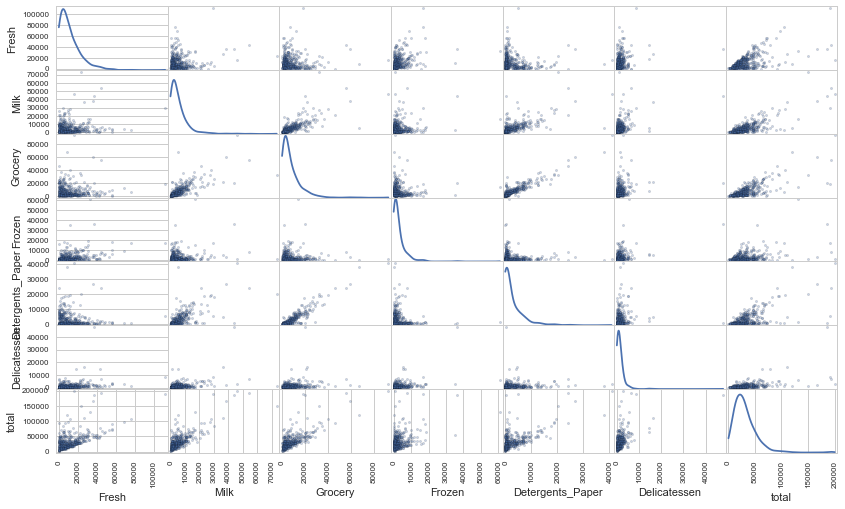

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
>"Detergents_Paper" have correlation with "Milk" and "Grocery". This map and correlation futher proved that "Fresh" and "Frozen" do not have strong connection with identifying. 

>This dataset is positively skewed  with potential outliers very high. There is median larger than mean.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

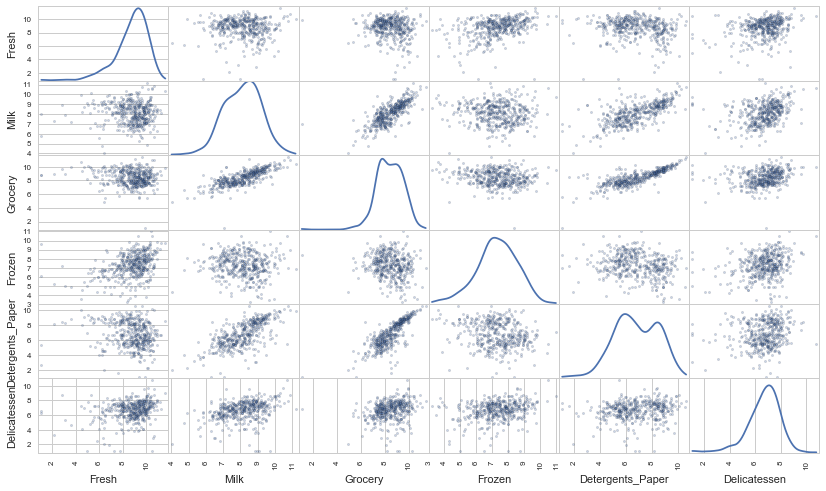

In [8]:
# TODO: Scale the data using the natural logarithm
data = data.drop('total', 1)
log_data = data.apply(np.log)


# TODO: Scale the sample data using the natural logarithm
samples = samples.drop('total',1)
log_samples = samples.apply(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
1,7.258412,9.288227,9.696894,7.373374,8.819665,7.516433
2,8.408271,9.574914,10.114882,8.174421,9.563459,7.427144


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
x_amount = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    x = pd.DataFrame(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    x_index = x.index
    x_amount = np.append(x_amount,x_index)
# OPTIONAL: Select the indices for data points you wish to remove
outliers = []
outliers_index  = np.unique(x_amount)
print "The indices of outliers we find and delete is: '{}'".format(outliers_index)
outliers_numbers = []
for i in outliers_index:
    outliers_numbers.append(i)    

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers_numbers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The indices of outliers we find and delete is: '[  38.   57.   65.   66.   75.   81.   86.   95.   96.   98.  109.  128.
  137.  142.  145.  154.  161.  171.  175.  183.  184.  187.  193.  203.
  218.  233.  264.  285.  289.  304.  305.  325.  338.  343.  353.  355.
  356.  357.  412.  420.  429.  439.]'


//anaconda/lib/python2.7/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

>Yes, sample 65, 66, 75, 128 and 154 are outliers more than one feature. 

>The outliers I delete is all the outliers including the 5 outliers having more than one features. I write a loop and find out all of those and delete them all.

>Those outliers are affecting the results and assumptions I make since they may not actually represent the features of one group of data.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

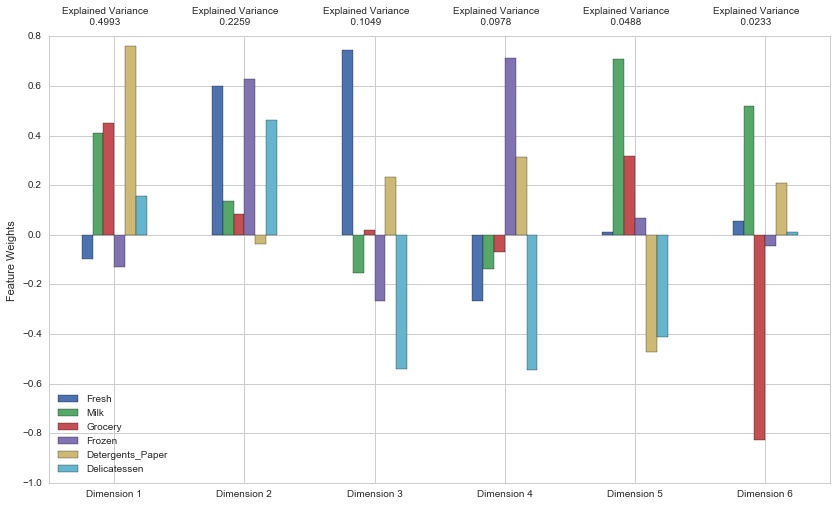

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

>The first and second principal component describe almost 71.0% of the explained variance. The first four principle components describe 91.91% of the explained variance.

>As the map showed, we can see that the first four represent "Fresh", "Frozen" and "Detergents_Paper" best.

>For the principal component 1, it increase 1 unit with increasing of "Mlik" and "Grocery" over 0.4 while "Detergents_Paper" increasing sharply to 0.7. This represent retail customers.

>For the principal component 2, it increase 1 unit with increasing of 0.6 of "Fresh" while "Frozen" and "Delicatessen" are increasing to 0.6 and 0.4 respectively. This may represent markets.

>As the principal component 3 showed, it increase 1 unit can make "Fresh" rising up to 0.7 and "Delicatessen" to 0.2. The negative of "Frozen" and "Delicatessen" tell us they will decrease greatly. I think it is cafe.

>For the principal component 2, it increase 1 unit with only high varience is "Frozen" reach to 0.7 and "Detergents_Paper" increasing to 0.3, though "Fresh" and "Delicatessen" decrease greatly for the reason. So, I suppose this is icecream shop.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.9935,1.2471,-1.2157,-0.6134,-0.6732,0.3420
1,2.8831,-0.5177,-1.2980,0.4078,-0.0470,-0.1114
2,3.5255,0.6832,-0.4676,0.8868,0.0404,-0.1299


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.9935,1.2471
1,2.8831,-0.5177
2,3.5255,0.6832


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

>K-Means clustering algorithm advatages:
1. Fast, robust and easier to understand.
2. Relatively efficient: O(tknd), where n is objects, k is clusters, d is dimension of each object, and t  is iterations. Normally, k, t, d << n.
3. Gives best result when data set are distinct or well separated from each other.

>Gaussian Mixture Model clustering algorithm advatages:
1. well-studied statistical inference techniques available.
2. flexibility in choosing the component distribution.
3. obtain a density estimation for each cluster.
4. a “soft” classification is available.

>I will choose K-Means since this is dataset is relatively small and easy to apply. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
k_pred = 20
for k in range(2,k_pred,1):
    clusterer = KMeans(n_clusters=k, random_state=42).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    print("Silhouette Score with k = " + str(k) + ": " + str(silhouette_score(reduced_data, preds)))
    
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)


Silhouette Score with k = 2: 0.447157742293
Silhouette Score with k = 3: 0.36398647984
Silhouette Score with k = 4: 0.331150954285
Silhouette Score with k = 5: 0.353193403287
Silhouette Score with k = 6: 0.363712346094
Silhouette Score with k = 7: 0.355334447306
Silhouette Score with k = 8: 0.368991429627
Silhouette Score with k = 9: 0.367452867107
Silhouette Score with k = 10: 0.3456848481
Silhouette Score with k = 11: 0.351354884536
Silhouette Score with k = 12: 0.352131602075
Silhouette Score with k = 13: 0.356834445894
Silhouette Score with k = 14: 0.356484017821
Silhouette Score with k = 15: 0.352421366607
Silhouette Score with k = 16: 0.361035195808
Silhouette Score with k = 17: 0.352278370031
Silhouette Score with k = 18: 0.351240877283
Silhouette Score with k = 19: 0.355654406698


In [16]:
clusterer = KMeans(n_clusters=2, random_state=42).fit(reduced_data)
preds = clusterer.predict(reduced_data)
print("Silhouette Score with k = " + str(2) + ": " + str(silhouette_score(reduced_data, preds)))
    
# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

Silhouette Score with k = 2: 0.447157742293


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

**Answer:**

>```Silhouette Score with k = 2: 0.446116935721
Silhouette Score with k = 3: 0.385940140294
Silhouette Score with k = 4: 0.341691260662
Silhouette Score with k = 5: 0.360561431462
Silhouette Score with k = 6: 0.370783749942
Silhouette Score with k = 7: 0.376068515247
Silhouette Score with k = 8: 0.367560000926
Silhouette Score with k = 9: 0.355622317631
Silhouette Score with k = 10: 0.356363960332
Silhouette Score with k = 11: 0.353026285908
Silhouette Score with k = 12: 0.354825902875
Silhouette Score with k = 13: 0.353861142105
Silhouette Score with k = 14: 0.363613892051
Silhouette Score with k = 15: 0.345961197939
Silhouette Score with k = 16: 0.352620382654
Silhouette Score with k = 17: 0.348626219229
Silhouette Score with k = 18: 0.346746380374
Silhouette Score with k = 19: 0.350113480874```

>The best silhouette score is  0.446116935721 and k = 2.

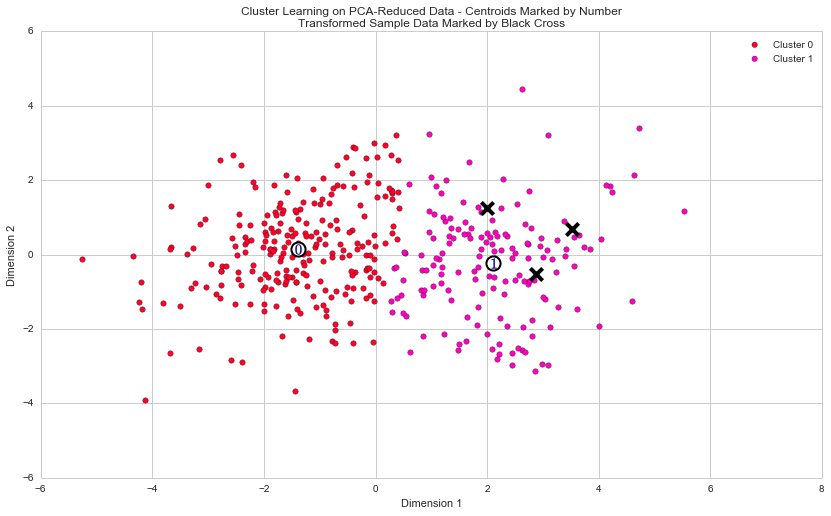

In [17]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [18]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())

display(true_centers)
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

>A customer who is assigned to 'Cluster 0' should best identify with markets represented by the feature "Milk", "Grocery" and "Detergents_Paper" since those three are all more than 75%. What is more, the total number is very high.

>A customer who is assigned to 'Cluster 1' should best identify with cafe represented by the feature "Fresh" since others are all lower than 50% and "Fresh" is higher 50% with low absolute number.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [19]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

>I used to think sample point 0 is small scale shop like cafe or yogurt bar. Actually, sample point 0 is predicted to be in Cluster 1 which is a large market; I used to predict this as cafe while it is NOT consistent with my prediction.

>I used to think sample point 1 is retail customer. Actually, sample point 1 is predicted to be in Cluster 1; I used to predict this as retail while this is NOT consistent with my prediction.

>I used to think sample 2 is market. Actually, sample point 2 predicted to be in Cluster 1; I used to predict this as markets while this is consistent with my prediction.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

>In marketing and business intelligence, A/B testing is a term for a randomized experiment with two variants, A and B, which are the control and variation in the controlled experiment. A/B testing is a form of statistical hypothesis testing with two variants leading to the technical term, two-sample hypothesis testing, used in the field of statistics.

>This A/B test would give different effects to two clusters since their features are not same.

>First, we will use the cluster build to seperate the data. Then, we should randomly set every cluster to same size with control and experiment group.They will give 5 or 3 days service to two groups of two clusters and caculate the outcome of general effect and finally make decision if change service is positively effective to clusters.

>Both of clusters have reason to react postively to this service change. But cluster 1 will act more positively than cluster 0 because the former have mostly "Fresh" and "Frozen" with elatively small scale total number which will help to change goods quickly.

>Cluster 0 also will respond to this change actively for it has large amount of "Milk" and "Detergents_Paper" which are fast moving consumer goods. While we should also notice this cluster have relatively large total numbers so it may restrict change in seveal features.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

>We can use any supervised leaning algorithm to determine what group the ten new cuntomers belongs to.

>The target varible will be the clusters we calculated.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

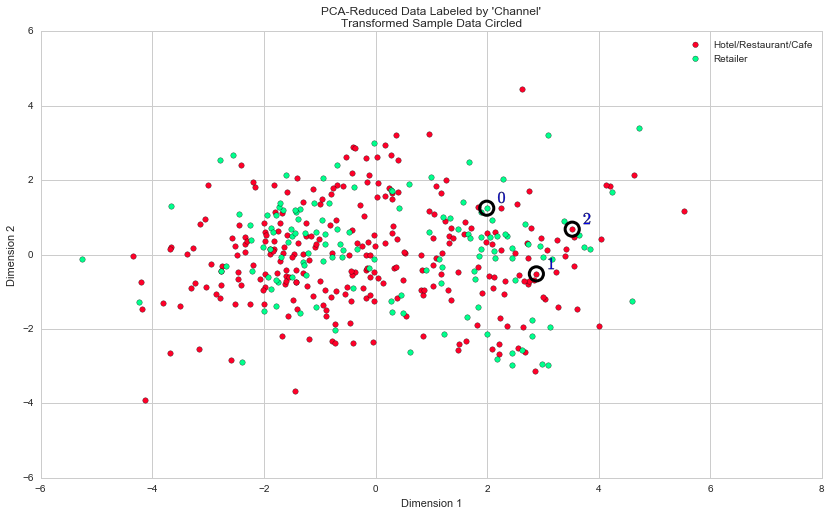

In [20]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

>This algorithm is not good as I used above since there are points belongs to one cluster while locate in another's center area.

>In this classification, there are crossed location with points of two  clusters which means hard to classifi.

>This is roughly good to predict but not as good as the results I created earlier.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.